In [3]:
import numpy as np
import matplotlib.pyplot as plt  
from celer import LassoCV, GroupLassoCV, celer_path
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import pandas as pd

# Tratamiento de datos

In [4]:
#leemos los datos
df = pd.read_excel("Tabla TFG Maria v2.xlsx")
df.head()

,POPULATION,x5,x10,x1,x2,x9,x3,x11,x4,x6,x7,x8,x12,x14
0,TRAIN,710 to 718_0,150 to 1E15_0,60000 to 1E15_0,0.35 to 0.7_1,-1E15 to 1_0,50 to 75_0,1 to 1E15_0,-1E15 to 111_1,0.0,1.0,0.0,0,5.094849
1,TEST,627 to 710_0,150 to 1E15_0,60000 to 1E15_0,0.35 to 0.7_1,1 to 1E15_0,50 to 75_0,1 to 1E15_0,-1E15 to 111_1,0.0,1.0,0.0,1,5.106910
2,TRAIN,627 to 710_0,150 to 1E15_0,60000 to 1E15_0,0.35 to 0.7_1,1 to 1E15_0,50 to 75_0,1 to 1E15_0,-1E15 to 111_1,0.0,1.0,0.0,1,5.106944
3,TRAIN,627 to 710_0,-2100 to 150_0,60000 to 1E15_0,0.35 to 0.7_1,-1E15 to 1_0,50 to 75_0,-1E15 to 1_1,-1E15 to 111_1,0.0,1.0,0.0,1,5.269766
4,TEST,729 to 733_0,-2100 to 150_0,60000 to 1E15_0,0.7 to 0.9_0,-1E15 to 1_0,80 to 1E15_1,-1E15 to 1_1,-1E15 to 111_1,0.0,1.0,0.0,0,5.075245


In [5]:
# Filtramos los datos en función de la columna "Population"
df_train = df[df["POPULATION"] == "TRAIN"]
df_test = df[df["POPULATION"] == "TEST"]

In [6]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15470 entries, 0 to 22092
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   POPULATION  15470 non-null  object 
 1   x5          15470 non-null  object 
 2   x10         15470 non-null  object 
 3   x1          15470 non-null  object 
 4   x2          15470 non-null  object 
 5   x9          15470 non-null  object 
 6   x3          15470 non-null  object 
 7   x11         15470 non-null  object 
 8   x4          15470 non-null  object 
 9   x6          15465 non-null  float64
 10  x7          15237 non-null  float64
 11  x8          15465 non-null  float64
 12  x12         15470 non-null  int64  
 13  x14         15470 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 1.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6623 entries, 1 to 22091
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --

In [7]:
#Eliminamos missing
df_train = df_train.dropna()
df_test = df_test.dropna()

## Creción dummies y variables numéricas

In [8]:
dummies_train = pd.get_dummies(df_train[['x5', 'x10', 'x1', 'x2', 'x9', 'x3', 'x11', 'x4']])
dummies_test = pd.get_dummies(df_test[['x5', 'x10', 'x1', 'x2', 'x9', 'x3', 'x11', 'x4']])

In [9]:
dummies_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15237 entries, 0 to 22092
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   x5_-1E15 to 627_0     15237 non-null  uint8
 1   x5_627 to 710_0       15237 non-null  uint8
 2   x5_710 to 718_0       15237 non-null  uint8
 3   x5_718 to 729_1       15237 non-null  uint8
 4   x5_729 to 733_0       15237 non-null  uint8
 5   x5_733 to 754_0       15237 non-null  uint8
 6   x5_754 to 1E15_0      15237 non-null  uint8
 7   x10_-1E15 to -8400_0  15237 non-null  uint8
 8   x10_-2100 to 150_0    15237 non-null  uint8
 9   x10_-8400 to -2100_0  15237 non-null  uint8
 10  x10_150 to 1E15_0     15237 non-null  uint8
 11  x1_-1E15 to 10000_0   15237 non-null  uint8
 12  x1_10000 to 15000_0   15237 non-null  uint8
 13  x1_15000 to 30000_0   15237 non-null  uint8
 14  x1_30000 to 60000_0   15237 non-null  uint8
 15  x1_60000 to 1E15_0    15237 non-null  uint8
 16  x2_-

In [10]:
X_numerical_train = df_train.drop(['x14', 'x5', 'x10', 'x1', 'x2', 'x9', 'x3', 'x11', 'x4', 'POPULATION'], axis=1).astype('float64')
X_numerical_test = df_test.drop(['x14', 'x5', 'x10', 'x1', 'x2', 'x9', 'x3', 'x11', 'x4', 'POPULATION'], axis=1).astype('float64')

In [11]:
dummies_train_2 = dummies_train.drop(['x5_754 to 1E15_0','x10_150 to 1E15_0', 'x1_60000 to 1E15_0', 
                               'x2_0.9 to 1E15_0','x9_1 to 1E15_0', 'x3_80 to 1E15_1',
                               'x11_1 to 1E15_0','x4_195 to 1E15_0'], axis=1)
dummies_test_2 = dummies_test.drop(['x5_754 to 1E15_0','x10_150 to 1E15_0', 'x1_60000 to 1E15_0', 
                               'x2_0.9 to 1E15_0','x9_1 to 1E15_0', 'x3_80 to 1E15_1',
                               'x11_1 to 1E15_0','x4_195 to 1E15_0'], axis=1)

## Variables dependientes y Variable independiente

In [12]:
# Concatenar variables dummy
X_train = pd.concat([X_numerical_train, dummies_train_2], axis=1)
X_test = pd.concat([X_numerical_test, dummies_test_2], axis=1)


In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15237 entries, 0 to 22092
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   x6                    15237 non-null  float64
 1   x7                    15237 non-null  float64
 2   x8                    15237 non-null  float64
 3   x12                   15237 non-null  float64
 4   x5_-1E15 to 627_0     15237 non-null  uint8  
 5   x5_627 to 710_0       15237 non-null  uint8  
 6   x5_710 to 718_0       15237 non-null  uint8  
 7   x5_718 to 729_1       15237 non-null  uint8  
 8   x5_729 to 733_0       15237 non-null  uint8  
 9   x5_733 to 754_0       15237 non-null  uint8  
 10  x10_-1E15 to -8400_0  15237 non-null  uint8  
 11  x10_-2100 to 150_0    15237 non-null  uint8  
 12  x10_-8400 to -2100_0  15237 non-null  uint8  
 13  x1_-1E15 to 10000_0   15237 non-null  uint8  
 14  x1_10000 to 15000_0   15237 non-null  uint8  
 15  x1_15000 to 30000_0

In [14]:
y_train = df_train["x14"]
y_test = df_test["x14"]

# GroupLasso 

In [17]:
#k-fold
from sklearn.linear_model import LassoCV

#por cada grupo variables juntas
g=[[0],[1],[2],[3],[4,5,6,7,8,9],[10,11,12],[13,14,15,16],
   [17,18,19,20,21,22],[23,24,25,26,27],[28],[29,30]]


In [18]:
# Lasso con 5 fold cross-validation
model_group_lasso = GroupLassoCV(groups=g, cv=5 )


In [19]:
# Fit model
results_group_lasso=model_group_lasso.fit(X_train, y_train)
model_group_lasso.alpha_

0.0021470836052628573

In [21]:
# Obtener las variables seleccionadas por Lasso
selected_variables_group_lasso = [X_train.columns[i] for i, coef in enumerate(results_group_lasso.coef_) if coef != 0]
print("Variables seleccionadas por GroupLasso:")
list(selected_variables_group_lasso)

Variables seleccionadas por GroupLasso:


['x6',
 'x7',
 'x8',
 'x5_-1E15 to 627_0',
 'x5_627 to 710_0',
 'x5_710 to 718_0',
 'x5_718 to 729_1',
 'x5_729 to 733_0',
 'x5_733 to 754_0',
 'x1_-1E15 to 10000_0',
 'x1_10000 to 15000_0',
 'x1_15000 to 30000_0',
 'x1_30000 to 60000_0',
 'x2_-1E15 to 0.05_0',
 'x2_0.05 to 0.1_0',
 'x2_0.1 to 0.2_0',
 'x2_0.2 to 0.35_0',
 'x2_0.35 to 0.7_1',
 'x2_0.7 to 0.9_0',
 'x9_-1E15 to 1_0',
 'x3_-1E15 to 30_0',
 'x3_30 to 50_0',
 'x3_50 to 75_0',
 'x3_75 to 80_0']

In [22]:
# Obtener las variables NO seleccionadas por Lasso
no_selected_variables_group_lasso = [X_train.columns[i] for i, coef in enumerate(results_group_lasso.coef_) if coef == 0]

# Mostrar las variables seleccionadas
print("Variables no seleccionadas por GroupLasso:")
list(no_selected_variables_group_lasso)

Variables no seleccionadas por GroupLasso:


['x12',
 'x10_-1E15 to -8400_0',
 'x10_-2100 to 150_0',
 'x10_-8400 to -2100_0',
 'x11_-1E15 to 1_1',
 'x4_-1E15 to 111_1',
 'x4_111 to 195_0']

# Resultados

In [23]:
# Modelo de regresión simple sin penalización en el conjunto de entrenamiento
regression_model_group_lasso = LinearRegression()
regression_model_group_lasso.fit(X_train[selected_variables_group_lasso], y_train)

y_pred_group_lasso = regression_model_group_lasso.predict(X_test[selected_variables_group_lasso])
r2_group_lasso = r2_score(y_test, y_pred_group_lasso)
print("R2 en el conjunto de prueba:", r2_group_lasso)

R2 en el conjunto de prueba: 0.07798291100160104


In [24]:
# Calcular el error cuadrático medio (RMSE)
rmse_group_lasso = mean_squared_error(y_test, y_pred_group_lasso, squared=False)
print("RMSE del algoritmo Group Lasso:", rmse_group_lasso)

RMSE del algoritmo Group Lasso: 0.43379984256974674


In [50]:
alphas, coefs, dual_gaps = celer_path(X_train, y_train, pb = "grouplasso", groups=g)

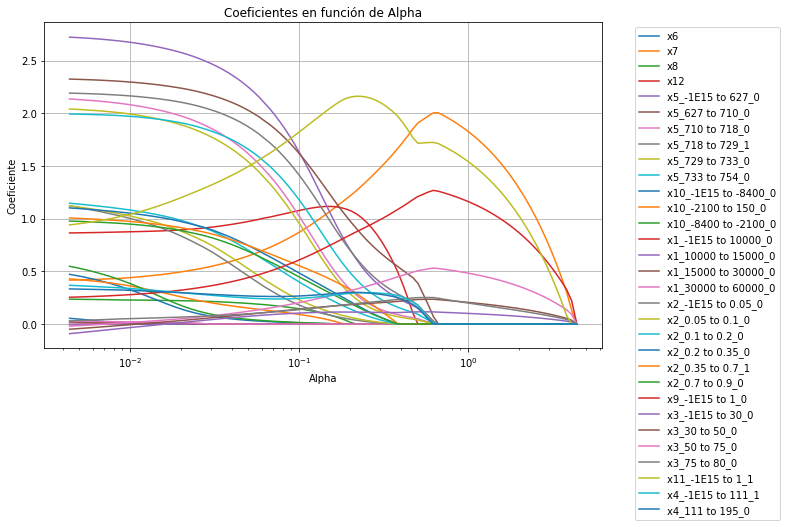

In [51]:
# Obtener los nombres de las variables
nombres_variables = X_train.columns

# Graficar coeficientes en función de alphas
plt.figure(figsize=(10, 6))
for i, coef in enumerate(coefs):
    plt.plot(alphas, coef, label=f'{nombres_variables[i]}')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coeficiente')
plt.title('Coeficientes en función de Alpha')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


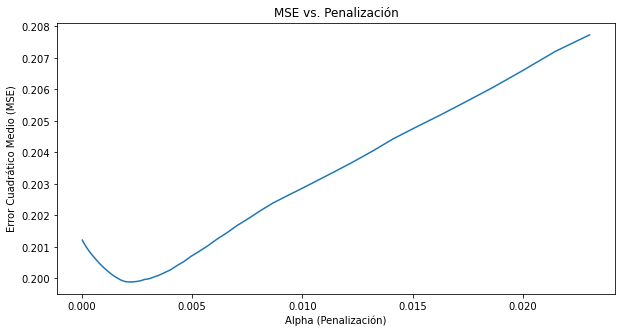

In [52]:
# Gráfico MSE vs.Alpha
alphas = results_group_lasso.alphas_
mse = np.mean(results_group_lasso.mse_path_, axis=1)
plt.figure(figsize=(10, 5))
plt.plot(alphas, mse)
plt.xlabel('Alpha (Penalización)')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('MSE vs. Penalización')
plt.show()